<a href="https://colab.research.google.com/github/Umerfarooq122/Linear-Regression-with-Box-Cox-transformation/blob/main/Blog_1_linear_regression_and_box_cox_transformation_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Box Cox transformation

Linear regression is a foundational statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). The core idea is to find the best-fitting linear relationship that describes how the independent variables relate to the dependent variable. In this particular Blog We will try to apply linear regression to a data set. First we will apply simple linear regression using all the paramters and then we will look at the statistical significance of the model. After that we will try to carry out box cox transformation and try to make the model better. So before any further due let's load the libraries

# Libraries

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import boxcox
import numpy as np
import seaborn as sns
from scipy import stats
import os

Above code cell have all the libraries that we will be using for this analysis. We will using linear regression from scikit-learn and ordinary least square (OLS) from statsmodels and will try to see how they are different. Note that we are using boxcox from scipy.stats.

# Importing Data and Preprocessing Data

In the below code cell we will load the data set. This data set has been downloaded from Kaggle. which is one of the largest data resources for data scientists. below is the link for the data set:

https://www.kaggle.com/datasets/awaiskaggler/insurance-csv

In [129]:
data = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/linear-regression-and-box-cox-transformation-in-python/main/insurance.csv")

In [130]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [131]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Since we have columns like `sex` and `smoker` which contains categorical data so we can replace the categorical data by dummy variables using `get_dummies` with '*OHE*'.

In [132]:
cat_cols = ["sex","smoker","region"]
df_encode = pd.get_dummies(data = data, prefix ='OHE', prefix_sep= '_',
                           columns= cat_cols,drop_first= True, dtype= 'int8')

In [133]:
df_encode.head()

,age,bmi,children,expenses,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


# Simple Linear Regression using Scikit-Learn and Statsmodels:

Now that our data set is ready so we can apply linear regression from scikit-learn.

## Scikit-learn:

In this case our target variable is column `expenses` and our independent variables are all the other columns in the data set. So let's create our X and y and also split the data for testing and training using `train_test_split`.

In [134]:
X = df_encode.drop(['expenses'], axis=1) #####Independent variable
y = df_encode['expenses']
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 0)

Now that our data has benn split we can go ahead and apply simple linear regression from scikit-learn. We can save the fitted model into a varaible called as `results`

In [135]:
simple_model = LinearRegression()
results = simple_model.fit(X_train, y_train)

Now our model is ready and saved in results and we can go ahead and apply it to our testing data and get the predictions. We will save the predictions in variable called `predictions`

In [136]:
predictions = results.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 31823064.32345028


In [95]:
#plt.plot(X_test['bmi'], predictions, color='red', linewidth=0.5)
#plt.scatter(X_test['bmi'], y_test, color='blue', s=2)

We can also get $R^2$ by using `.score()`

In [96]:
r_sq = simple_model.score(X_test,y_test)
print(r_sq)

0.8000184017333827


Similarly the intercept and coefficients

In [97]:
print(f"intercept: {simple_model.intercept_}")
print(f"Coefficients : {simple_model.coef_}")

intercept: -11830.120432327078
slope: [ 2.53672431e+02  3.36037169e+02  4.37172067e+02 -1.56717332e+01
  2.36038220e+04 -2.59484526e+02 -9.13867261e+02 -7.61103576e+02]


We Can also calculate the residuals and check the distrbution of the residuals

In [137]:
residuals = y_test-predictions

<ipython-input-138-d941847ea87b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


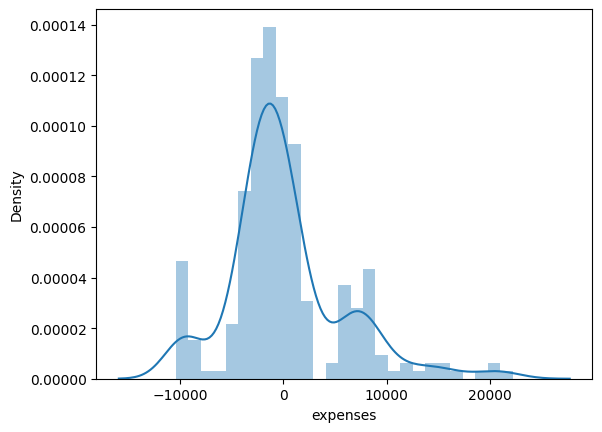

In [138]:
sns.distplot(residuals)
plt.show()

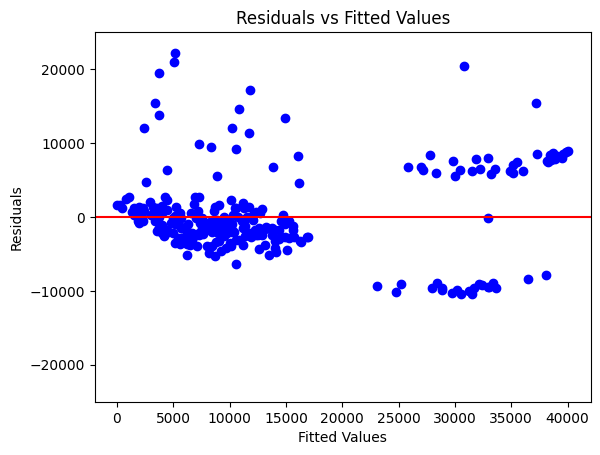

In [139]:
plt.scatter(predictions,residuals,color='b')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.ylim(-25000,25000)
plt.title('Residuals vs Fitted Values')
plt.show()

As we saw that the distribution of residuals does bot look like a complete normal distribution and also the residuals vs fitted values plot does not show homoscadicity. Which means that this model might not be a very good representation of this data and we have to look for an alternative models. So let's try BOXCOX transformation on the model.

## BOX COX Trasnsformation:

In this section we will try to transform the target variable using boxcox and see if that can helps in anyway to make the model better. Before transformation lets look at the distribution of our target variable from the data set using histogram.

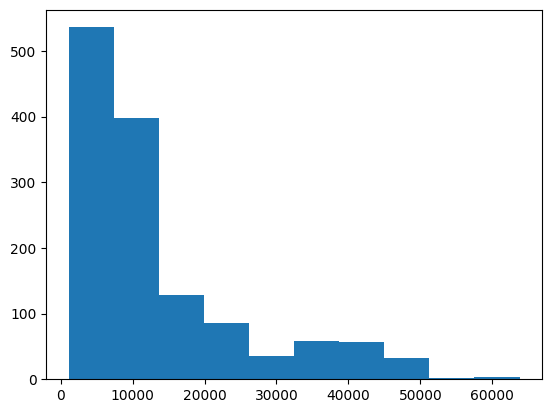

In [101]:
plt.hist(df_encode['expenses'])
plt.show()

We can see that there is a clear skewness (Right Skewness) in the distribution so lets transform that and then plot the same target varaible to check the distribution. Below code cell transform the traget variable using boxcox.  

In [102]:
y_bc, lam , ci = boxcox(df_encode['expenses'],alpha = 0.05)

ci, lam

((-0.011402950284988304, 0.09880965012231949), 0.04364902969059508)

Now we can check the distribution of our target variable

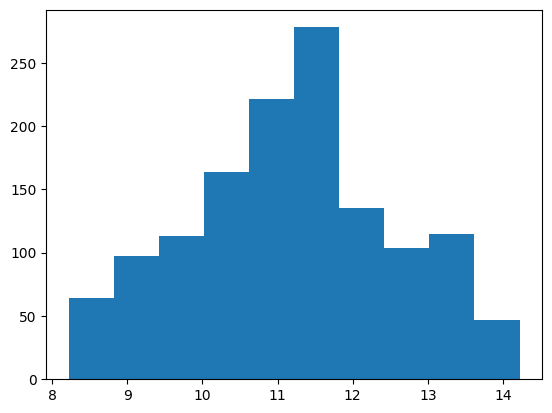

In [103]:
plt.hist(y_bc)
plt.show()

As we can see that the distribbution is very close to bieng noraml so let's go ahead and apply the linear regression model

In [141]:
df_encode['expenses'] = y_bc

In [143]:
X = df_encode.drop('expenses',axis =1) #####Independent variable
y = df_encode['expenses']#### Dependent variable

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [144]:
bc_model = LinearRegression()
bc_model.fit(X_train,y_train)

LinearRegression()

In [145]:
bc_predict = bc_model.predict(X_test)

Now our predicitons are here but we have to convert it back since these prediction are boxcox transformed so we have to do the inverse of boxcox transformation to get the orginal value back.

In [146]:
bc_predict_org = np.power((bc_predict*lam)+1,1/lam)

In [148]:
bc_mse = mean_squared_error(bc_predict_org,y_test)

#R- square

r_sqbc = bc_model.score(X_test,y_test)

print('the mean sqaure is :',bc_mse)
print('the r sqaure is :',r_sqbc)

the mean sqaure is : 265311661.53876856
the r sqaure is : 0.7783120473802803



Mean square error is reduced but the $R^2$ has also reduced



In [149]:
residuals_bc = (y_test - bc_predict_org)

<ipython-input-150-7d19785610de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_bc)


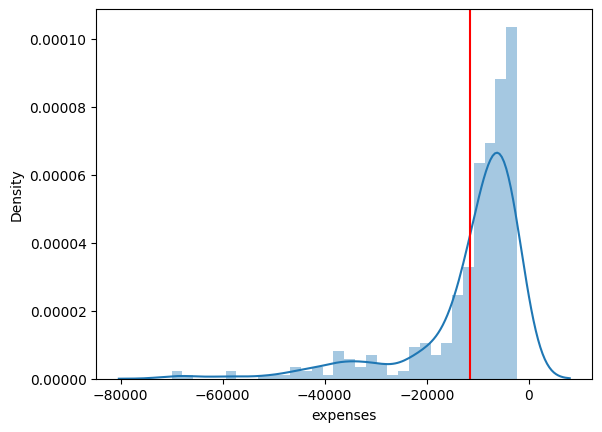

In [150]:
sns.distplot(residuals_bc)
plt.axvline((residuals_bc).mean(), color = 'r')
plt.show()

Text(0.5, 1.0, 'Residuals vs Fitted Values')

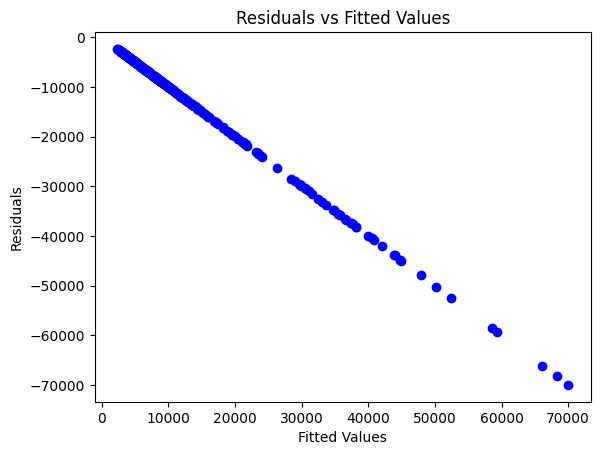

In [151]:
plt.scatter(bc_predict_org,residuals_bc,color='b')
#plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.title('Residuals vs Fitted Values')

In this Case BoxCox transformation also did not improve the results in fact it looks worse than simple. THis means that further investigation is demanded to get an appropriate results for this kidn of data set.

## Stats Model:

In [115]:
sm_model = sm.OLS(y_train, X_train)

In [116]:
results = sm_model.fit()

In [117]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:27:18   Log-Likelihood:                -762.88
No. Observations:                 936   AIC:                             1600.
Df Residuals:                     899   BIC:                             1779.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0122      0.502     13.976      0.0

In [118]:
sm_prediction = results.predict(X_test)

In [119]:
print(sm_prediction)

[11.86793423 10.57457956 12.84120357 11.34813626  9.84168886 11.10545501
 13.34483432 10.30671026 12.03724557 13.91940901  9.58026556 12.94512875
  9.86410824 11.87323674 10.71670436 10.31546062 10.9088761   9.50258377
 13.61931645 13.35421923 13.5495427  11.24878522 10.9360566  11.67140655
 13.59827589 10.55535879 10.40660297 13.21307965  9.50869263 11.15206643
 11.78137436  9.54842643 10.13640482 11.88291894 10.70366677 12.75162173
 11.79006235 11.13059451 11.48235864 10.17051019 11.52487866 13.35474946
 11.59037753 12.47932342 11.84879038 11.32512824 10.43075559 10.40570576
 11.27290472 10.57405002 11.64069578 10.89246752 11.44262868  9.94930773
 10.15072027 11.45180575 11.5425804  11.25637336 10.93367125 12.78496947
 12.99110047 10.15462171  8.91353118 10.2776561   9.54772211 10.60812579
  9.08575798  8.89015061 10.25335121 12.06851693 10.9479851  13.26928539
 10.90145296 12.7550856   9.43220129 10.1835491  11.43691054 10.45872045
 10.00508665 10.04060241 11.63774435  9.42423236 13

In [120]:
sm_residuals = results.resid

(array([163., 636.,  64.,  17.,  19.,  14.,  12.,   5.,   3.,   3.]),
 array([-0.7312234 , -0.29174137,  0.14774065,  0.58722268,  1.0267047 ,
         1.46618673,  1.90566875,  2.34515077,  2.7846328 ,  3.22411482,
         3.66359685]),
 <BarContainer object of 10 artists>)

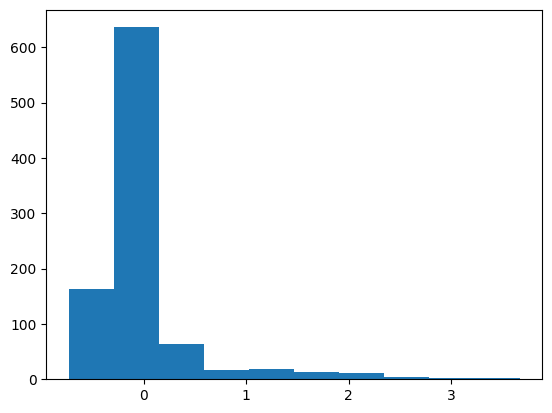

In [126]:
plt.hist(sm_residuals)

In [122]:
c_resid = (y_test - sm_prediction)

(array([ 50., 268.,  42.,   7.,   9.,   8.,   8.,   4.,   2.,   4.]),
 array([-0.68981684, -0.33822357,  0.01336969,  0.36496296,  0.71655623,
         1.06814949,  1.41974276,  1.77133602,  2.12292929,  2.47452256,
         2.82611582]),
 <BarContainer object of 10 artists>)

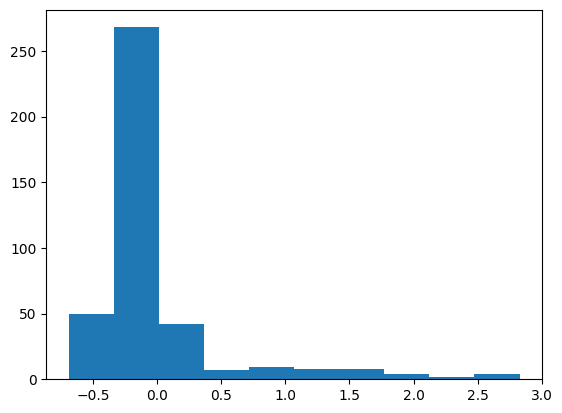

In [127]:
plt.hist(c_resid)

ValueError: ignored

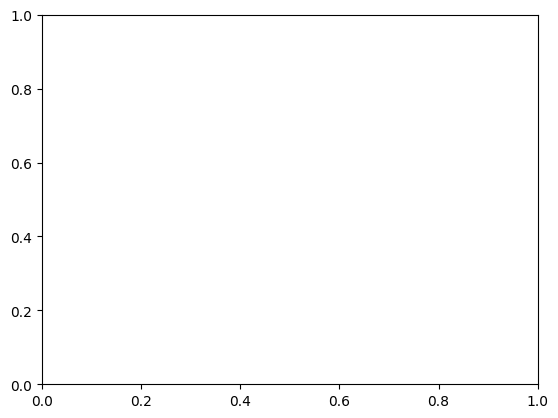

In [125]:
plt.scatter(sm_prediction,sm_residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

ValueError: ignored